## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

## Read the data into dataframe

In [2]:
df = pd.read_csv("voice.csv")
df.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Check for null values in DF

In [3]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [4]:
df.shape

(3168, 21)

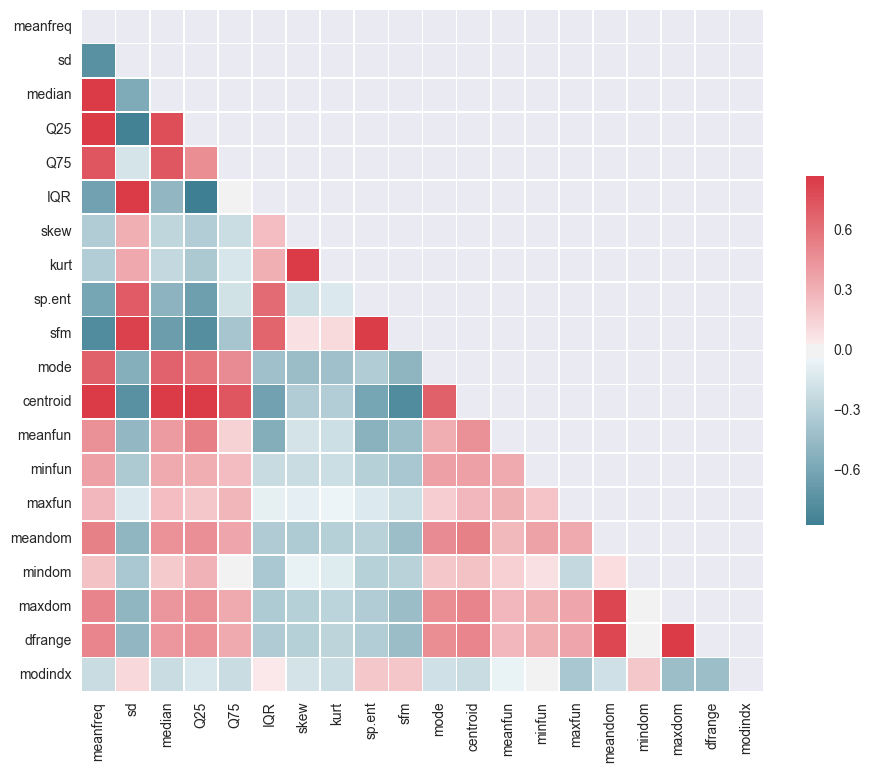

In [5]:
## Check the correlation between  each feature:
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Descriptives stats:

In [6]:
print"Total number of voices in dataset: {}".format(df.shape[0])
print"Number of males: {}".format(df[df.label=='male'].shape[0])
print"Number of females: {}".format(df[df.label=='female'].shape[0])

Total number of voices in dataset: 3168
Number of males: 1584
Number of females: 1584


## Separating features and labels:

In [7]:
features = df.iloc[:,:-1]
features.head(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.0,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.0,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.0,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512


## Encode categorical  features:

In [8]:
from sklearn.preprocessing import LabelEncoder
y = df.iloc[:,-1]

#male-->1
#female --> 0

enc = LabelEncoder()
y = enc.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Data Standardisation: 

Data standardization is converting the data into a common format which will alow further large-scale analytics.
<br>Statistically data standardisation refers to shifting mean distribution of each attribute to zero and standard deviation of 1. Usually it is done using sklearn.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

## Train Test Split:

In [10]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train , y_test = train_test_split(features,y,test_size =0.20,random_state=0)

## Using SVM for classification

In [11]:

from sklearn.svm import SVC
from sklearn import metrics

svc = SVC()#Runing SVM with default parameter
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print "Default accuracy score: "
print(metrics.accuracy_score(y_test,y_pred))

Default accuracy score: 
0.984227129338


## Using linear kernal

In [12]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print "Default accuracy score: "
print(metrics.accuracy_score(y_test,y_pred))

Default accuracy score: 
0.973186119874


## USing rbf kernel

In [13]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print "Default accuracy score: "
print(metrics.accuracy_score(y_test,y_pred))

Default accuracy score: 
0.984227129338


## Using sigmoid kernal

In [14]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print "Default accuracy score: "
print(metrics.accuracy_score(y_test,y_pred))

Default accuracy score: 
0.957413249211


Of the three kernels the best performing kernel is rbf and the worst performing kernal is polynomial (maybe due to overfitting)

## Performing K-Fold cross-validation with different kernels

Now that we use k-fold cross-validation to see if the results rae consistent.Usually mean of the CV is considred as final accuracy

## About k-fold cross-validation
<br><br>
Depending on the value of k, the data is spilt into k-subsets as training bins abd remaining (k-1) training set.This process is repeated k-times anbd the average of k tests is taken. We use all k sets for traiing and testing.

## CV on linear kernel

In [15]:
from sklearn.cross_validation import cross_val_score
svc = SVC(kernel= 'linear')
scores = cross_val_score(svc, features,y, cv=10,scoring = 'accuracy')
print("Scores over 10 CV are: {}" .format(str(scores)))
print("Average accuarcy: ", scores.mean())

Scores over 10 CV are: [ 0.91194969  0.97169811  0.97169811  0.97169811  0.96202532  0.98734177
  0.99050633  0.98101266  0.95253165  0.99367089]
('Average accuarcy: ', 0.96941326327521682)


## CV on rbf kernel

In [16]:
svc = SVC(kernel= 'rbf')
scores = cross_val_score(svc, features,y, cv=10,scoring = 'accuracy')
print("Scores over 10 CV are: {}" .format(str(scores)))
print("Average accuarcy: ", scores.mean())

Scores over 10 CV are: [ 0.93396226  0.95597484  0.96855346  0.9591195   0.96835443  0.99683544
  0.98734177  0.98101266  0.91455696  0.99367089]
('Average accuarcy: ', 0.96593822147918151)


## CV on polynomial kernel

In [17]:
svc = SVC(kernel= 'poly')
scores = cross_val_score(svc, features,y, cv=10,scoring = 'accuracy')
print("Scores over 10 CV are: {}" .format(str(scores)))
print("Average accuarcy: ", scores.mean())

Scores over 10 CV are: [ 0.89937107  0.94654088  0.93081761  0.91509434  0.95886076  1.
  0.98101266  0.96835443  0.87974684  0.9778481 ]
('Average accuarcy: ', 0.94576466841811957)


Another important parameter to be considred is the C-parameter.
<br>In a SVM you are searching for two things: a hyperplane with the largest minimum margin, and a hyperplane that correctly separates as many instances as possible. The problem is that you will not always be able to get both things. The c parameter determines how great your desire is for the latter. I have drawn a small example below to illustrate this. To the left you have a low c which gives you a pretty large minimum margin (purple). However, this requires that we neglect the blue circle outlier that we have failed to classify correct. On the right you have a high c. Now you will not neglect the outlier and thus end up with a much smaller margin.

In [18]:
c_range = list(range(1,26))
acc_score =[]
for c in c_range:
    svc = SVC(kernel= 'linear', C = c)
    scores = cross_val_score(svc, features,y, cv=10,scoring = 'accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.96941326327521682, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96909879786641184, 0.96941326327521682, 0.96909879786641184, 0.96878433245760687, 0.96846986704880178, 0.96846986704880178, 0.96846986704880178, 0.96846986704880178, 0.96815341135259914, 0.96815341135259914, 0.96815341135259914, 0.96815341135259914, 0.9678369556563966, 0.9678369556563966, 0.9678369556563966, 0.9678369556563966, 0.96815341135259914, 0.96846787676140433, 0.96846787676140433, 0.9681514210652018, 0.9681514210652018]


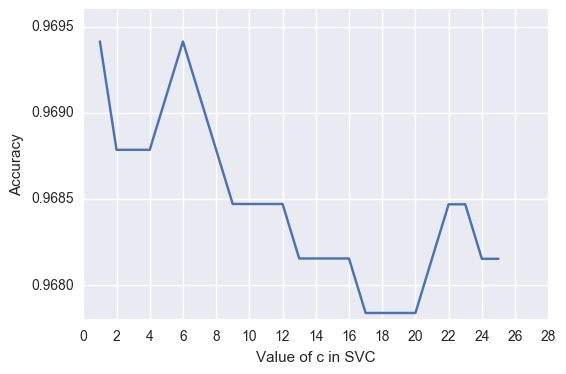

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(c_range, acc_score)
plt.xticks(np.arange(0,30,2))
plt.xlabel("Value of c in SVC")
plt.ylabel("Accuracy")

We can see that the classifier performms the best when c=1 and c=6,i.e, the classifier has accuracy of 96%.Other than those two values of c, the accuracy is seen to be reducing.

## Reducing the value of c

In [20]:
c_range = list(np.arange(0.1,6,0.1))
acc_score =[]
for c in c_range:
    svc = SVC(kernel= 'linear', C = c)
    scores = cross_val_score(svc, features,y, cv=10,scoring = 'accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.97004816495501944, 0.96910078815380951, 0.96909879786641184, 0.96909879786641184, 0.96941326327521682, 0.96941326327521682, 0.96972772868402191, 0.96941127298781937, 0.9690968075790144, 0.96941326327521682, 0.96941326327521682, 0.96941326327521682, 0.96941326327521682, 0.96878234217020953, 0.96909879786641184, 0.96909879786641184, 0.96909879786641184, 0.96909879786641184, 0.96878433245760687, 0.96878433245760687, 0.96909879786641184, 0.96909879786641184, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96909879786641184, 0.96909879786

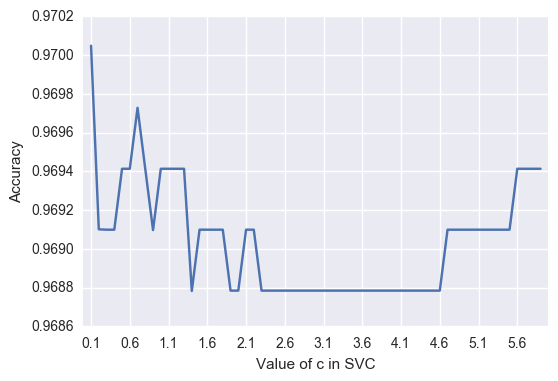

In [21]:
plt.plot(c_range, acc_score)
plt.xticks(np.arange(0.1,6,0.5))
plt.xlabel("Value of c in SVC")
plt.ylabel("Accuracy")

From the above graph we are able to note that accuracy is max at c=0.1, for other values the c the accuracy is reducing.


## Using different value for gamma

the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.
The behavior of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.
<br>
When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

## Taking rbf kernel for different values of gamma

In [25]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, features, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.9681514210652018, 0.96783894594379449, 0.96783496536899916, 0.96688957885518645, 0.96593822147918151]


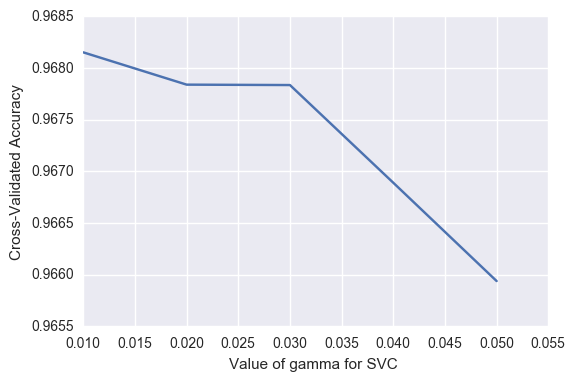

In [26]:
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

Thus gamma is maximum at 0.01

## ALternate approach

**Grid search cross-validation method**

In [28]:
from sklearn.svm import SVC
svm_model= SVC()

In [29]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [30]:
from sklearn.grid_search import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [31]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.954617205998


In [35]:
#print(model_svm.grid_scores_)

In [33]:
print(model_svm.best_params_)

{'kernel': 'poly', 'C': 0.90000000000000002, 'gamma': 0.05, 'degree': 3}


In [34]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.957413249211
